In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


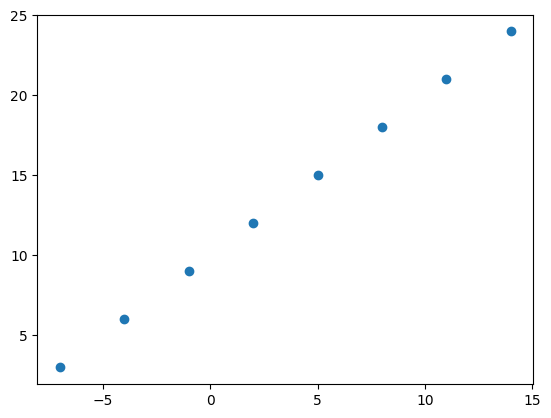

In [14]:


X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [5]:
# Demo tensor for housing price pred

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

2025-02-09 13:16:13.183115: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-09 13:16:13.183351: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-09 13:16:13.183361: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739135773.184174 1950974 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739135773.184682 1950974 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

### Steps in modeling in tensorflow
1. Create a Model - Define input and output layers. Along with hidden NN layers.
2. Compile model - Define Loss function, Optimizer, and evaluation metric.
3. Fit Model

In [33]:
tf.random.set_seed(42)


# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 9.0887 - mae: 9.0887
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.9562 - mae: 8.9562
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8237 - mae: 8.8237
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.6912 - mae: 8.6912
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.5587 - mae: 8.5587
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.4262 - mae: 8.4262
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.2937 - mae: 8.2937
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.1612 - mae: 8.1612
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.0287 - mae: 8.0287
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8962 - mae: 7.8962
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.7637 - mae: 7.7637
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.6312 - mae: 7.6312
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.

In [34]:
# Make a prediction

model.predict(np.array([17.], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[29.568857]], dtype=float32)